In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [24]:
# Load the CSV file
df = pd.read_csv('data/test_data/test_ac_data.csv')

# Extract the 'Active (W)' column values
X = df['Active (W)'].values.reshape(-1, 1)

# Apply k-means clustering with k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Plot the clusters
# plt.scatter(X, [0] * len(X), c=kmeans.labels_, cmap='viridis')

# Get the centroids
centroids = kmeans.cluster_centers_

# Calculate the threshold value
threshold = (centroids[0][0] + centroids[1][0]) / 2

print("Threshold value:", threshold)


Threshold value: 988.6403197714253


In [11]:
# Create a new column in the DataFrame to store the binary values
df['Binary'] = (df['Active (W)'] > threshold).astype(int)

# Create a new DataFrame with 'Timestamp' and 'Binary' columns
new_data = df[['Timestamp', 'Binary']].copy()

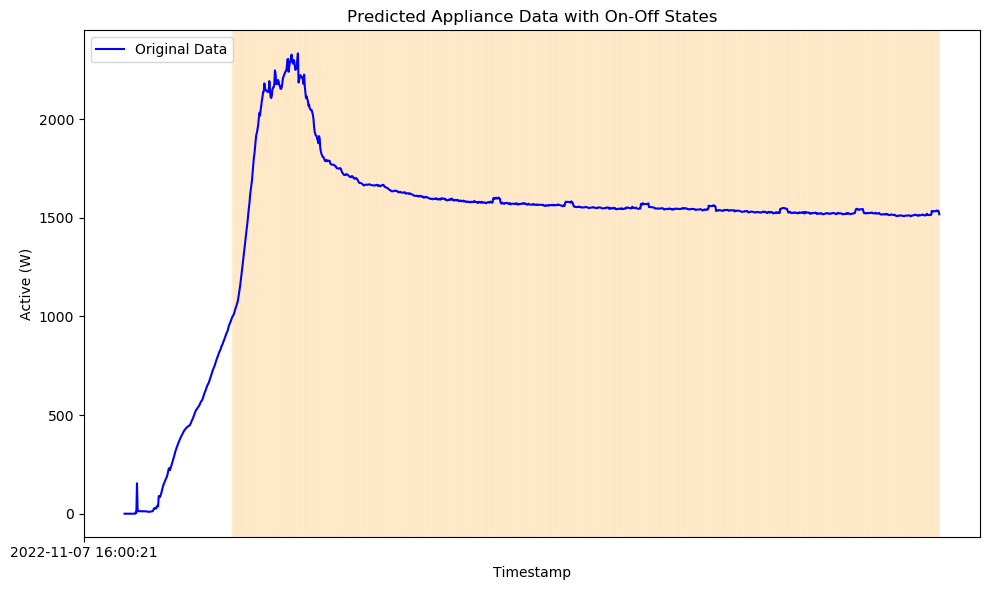

In [25]:
# Convert Timestamp column to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
new_data['Timestamp'] = pd.to_datetime(new_data['Timestamp'])

# Plot original dataset
plt.figure(figsize=(10, 6))

# Plot line graph of original data
plt.plot(df['Timestamp'], df['Active (W)'], color='blue', label='Appliance Name')

# Iterate through rows in new_data to plot background colors
for i in range(1, len(new_data)):
    if new_data.loc[i, 'Binary'] == 1:
        plt.axvspan(new_data.loc[i-1, 'Timestamp'], new_data.loc[i, 'Timestamp'], color='orange', alpha=0.05)

# Set x-axis format to date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Active (W)')
plt.title('Predicted Appliance Data with On-Off States')

# Show legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

